In [4]:
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, mean_squared_error

In [5]:
height = 300
width = 300

In [6]:
# Define directories for training and validation data.
train_dir = "C:/Users/ASUS/Downloads/Identification_of_Fake_Currency_Found_in_India-main/Identification_of_Fake_Currency_Found_in_India-main/Dataset(50)/Training"
validation_dir = "C:/Users/ASUS/Downloads/Identification_of_Fake_Currency_Found_in_India-main/Identification_of_Fake_Currency_Found_in_India-main/Dataset(50)/Validation"

In [7]:
batch_size = 8

In [8]:
# Data augmentation for training images.
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90,
                                   horizontal_flip=True, vertical_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(height, width),
                                                    batch_size=batch_size, class_mode='binary')

Found 43 images belonging to 2 classes.


In [9]:
# Data augmentation for validation images.
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90,
                                        horizontal_flip=True, vertical_flip=True)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(height, width),
                                                              batch_size=batch_size, class_mode='binary')

Found 31 images belonging to 2 classes.


In [10]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, 3))


In [11]:
# Add custom top layers for classification.
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [12]:
# Combine base model with custom top layers
finetune_model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
# Freeze layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [14]:
# Compile the model
finetune_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


In [16]:

# Checkpoint and early stopping
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max', restore_best_weights=True)


In [17]:
# Train the model on training data with validation on validation data.
history = finetune_model.fit(train_generator, steps_per_epoch=len(train_generator),epochs=100,validation_data=validation_generator, validation_steps=len(validation_generator),callbacks=[checkpoint, early_stop])


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6576 - loss: 77.4040
Epoch 1: val_accuracy improved from -inf to 0.70968, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 51s 8s/step - accuracy: 0.6533 - loss: 81.1556 - val_accuracy: 0.7097 - val_loss: 33.9373
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7304 - loss: 60.6639
Epoch 3: val_accuracy did not improve from 0.70968
6/6 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7357 - loss: 57.4275 - val_accuracy: 0.5484 - val_loss: 105.3874
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6489 - loss: 96.6973 
Epoch 5: val_accuracy improved from 0.70968 to 0.96774, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - accuracy: 0.6559 - loss: 92.7399 - val_accuracy: 0.9677 - val_loss: 6.9030
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7638 - loss: 53.6346
Epoch 7: val_accuracy improved from 0.96774 to 1.00000, saving model to best_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.7710 - loss: 51.4409 - val_accuracy: 1.0000 - val_loss: 1

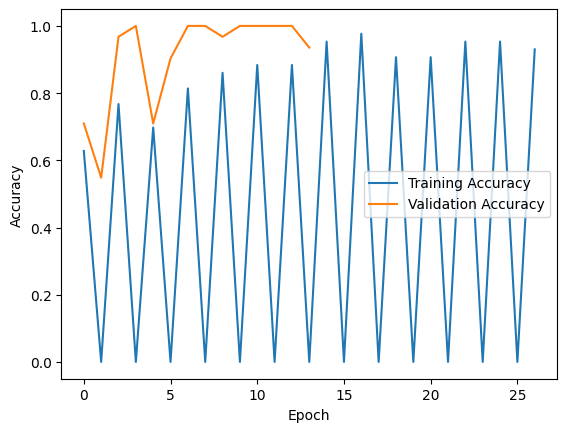

In [18]:
# Plot training and validation accuracy over epochs.
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


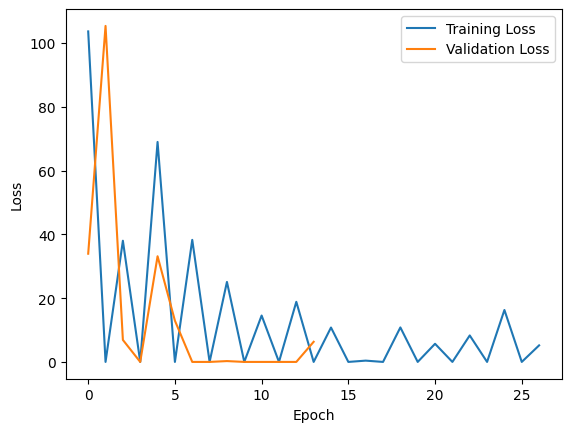

In [19]:
# Plot training and validation loss over epochs.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
# Testing the model
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(height, width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Real"
    else:
        return "Fake"

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


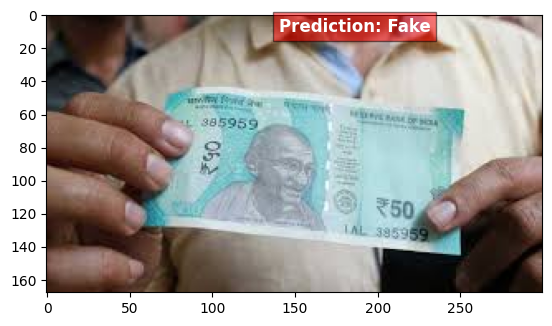

Prediction: Fake


In [21]:
# Specify the image path
test_img_path ="C:/Users/ASUS/Downloads/Identification_of_Fake_Currency_Found_in_India-main/Identification_of_Fake_Currency_Found_in_India-main/Dataset(50)/Testing/Fake/1.jpeg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


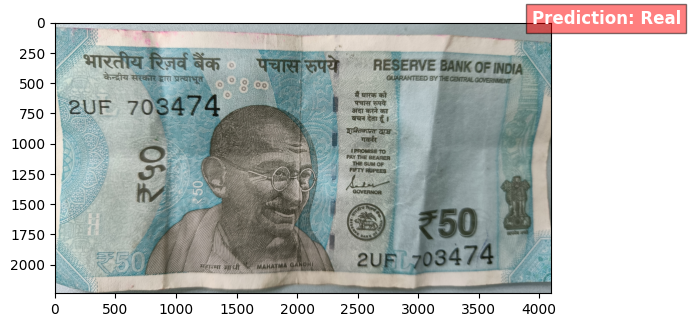

Prediction: Real


In [23]:
# Specify the image path
test_img_path ="C:/Users/ASUS/Downloads/Identification_of_Fake_Currency_Found_in_India-main/Identification_of_Fake_Currency_Found_in_India-main/Dataset(50)/Testing/Real/1.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)

In [25]:
# Calculate overall accuracy of the model on the training set
overall_accuracy_training = finetune_model.evaluate(train_generator, steps=len(train_generator), verbose=1)

# Print overall accuracy on training set
print("Overall Accuracy on Training Set:", overall_accuracy_training[1])


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 541ms/step - accuracy: 0.8552 - loss: 26.6113
Overall Accuracy on Training Set: 0.8837209343910217


In [27]:
# Calculate overall accuracy of the model on the validation set.
overall_accuracy =finetune_model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)

# Print overall accuracy.
print("Validation Accuracy:", overall_accuracy[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 684ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 1.0


Found 31 images belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


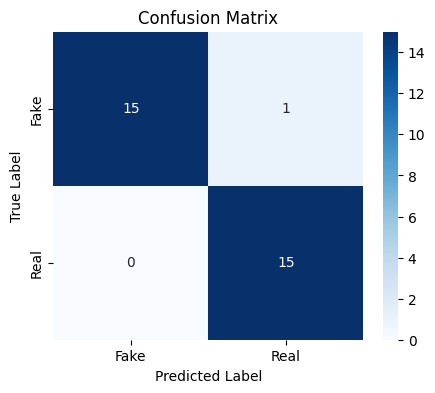

In [28]:
# Predict the whole validation set
validation_generator_predict = validation_datagen.flow_from_directory(validation_dir, target_size=(height, width),
                                                                      batch_size=batch_size, class_mode='binary', shuffle=False)
validation_generator_predict.reset()
predictions = finetune_model.predict(validation_generator_predict, steps=len(validation_generator_predict), verbose=1)
predicted_classes = (predictions > 0.5).astype(int)
true_classes = validation_generator_predict.classes

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()